# Preparations

In [9]:
# Imports
import json
from pathlib import Path
from typing import Union

import requests
from rich import print
from rich.console import Console

# Helper method to get access token
from config.config import ApiConfig
# Helper methods for image and music output
from utils import show_image_from_response, show_image_from_path, play_music_from_response

console = Console()

In [10]:
def inferencehub_request(model_domain: str, model_name: str, input: Union[str, Path], input_type: str, input_params={}):
    with console.status("Getting fresh access token...") as stat:
        config = ApiConfig()

        stat.update("Loading input payload...")
        # The input format depends on the custom preprocessing function of the model
        if input_type == "image":
            input_payload = open(input, 'rb')
        elif input_type == "text":
            input_payload = json.dumps(input)
        else: raise AttributeError("input_type unknown!")

        stat.update("Making predict request...")
        response = requests.post(
            url=f"{config.API_URL}/{model_domain}/{model_name}/predict",
            files={
                "input_payload": input_payload, 
                'input_parameters': json.dumps(input_params)
            },
            headers=config.headers
        )
        response.raise_for_status()
    print("[bold green]Response received! 🎉🎉🎉", )
    return response.json()

# Image Classification with Simple TensorFlow Model
This is a simple image classifier trained on Cifar-10. The following shows the picture that will be posted to https://www.inferencehub.io/.

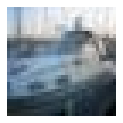

In [11]:
show_image_from_path("input_samples/image-tensorflow-simple-img-classifier.jpg", size=(2, 2))

We can post this picture to our API now, where the TensorFlow Classifier is uploaded:

In [12]:
resp = inferencehub_request(
    model_domain='image', 
    model_name='tensorflow-simple-img-classifier',
    input="input_samples/image-tensorflow-simple-img-classifier.jpg",
    input_type="image"
    )

⠹ Getting fresh access token...

Response received! 🎉🎉🎉

In [13]:
print(resp)

"ship"

# Image Segmentation with UNet
This model is used for image segmentation and is trained on cars.
The following shows the input sample and the corresponding prediction output:

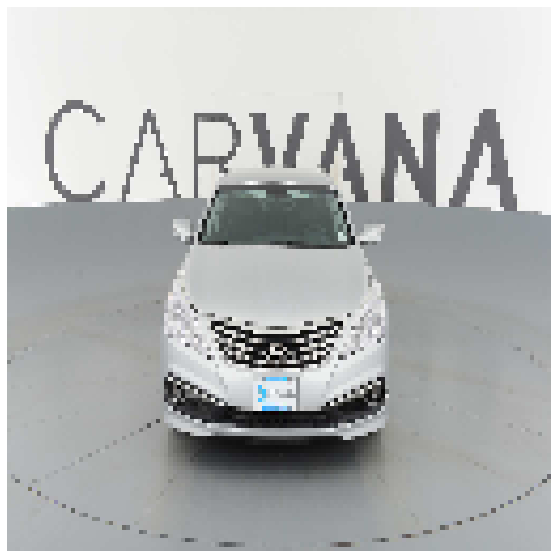

Output()

Response received! 🎉🎉🎉

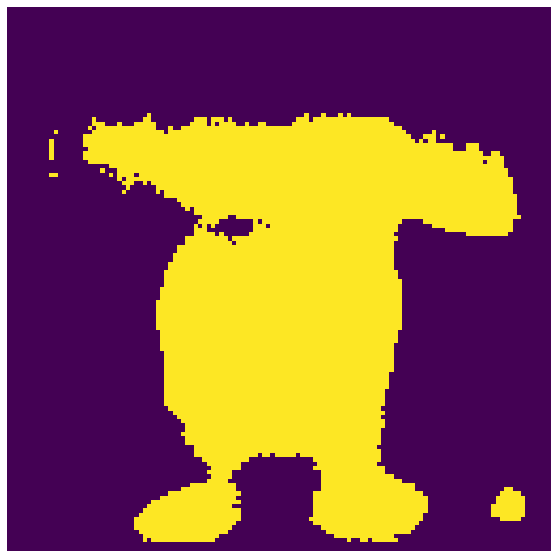

In [14]:
show_image_from_path("input_samples/image-unet.png")
resp = inferencehub_request(
    model_domain="image", 
    model_name='PyTorch-2D-3D-UNet-Tutorial', 
    input="input_samples/image-unet.png", 
    input_type="image"
    )
show_image_from_response(resp)

# Object Detection with Yolo5
This is a standard version of the YOLOv5 model from https://github.com/ultralytics/yolov5.

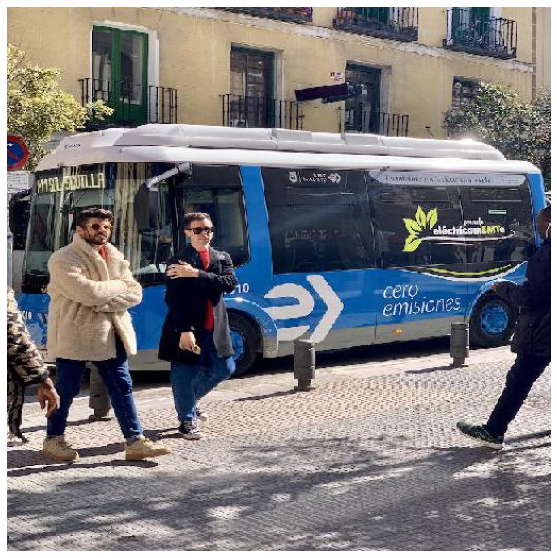

Output()

Response received! 🎉🎉🎉

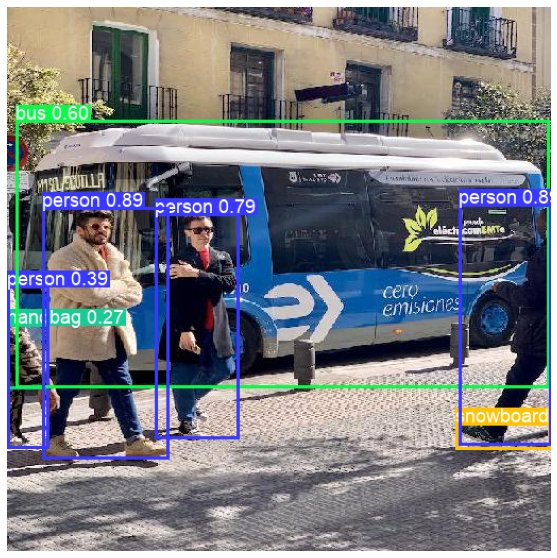

In [15]:
show_image_from_path("input_samples/image-yolo5.jpg")
resp = inferencehub_request(
    model_domain="image",
    model_name='YOLOv5m', 
    input="input_samples/image-yolo5.jpg", 
    input_type="image"
    )
show_image_from_response(resp)

# Music Generation with GPT-2
This model uses the language model GPT-2 to generate music. The original model is from https://huggingface.co/TristanBehrens/js-fakes-4bars.

In [16]:
resp = inferencehub_request(
    model_domain='audio', 
    model_name='js-fakes-4bars', 
    input="PIECE_START STYLE=JSFAKES GENRE=JSFAKES TRACK_START INST=48 BAR_START NOTE_ON=60",
    input_type="text"
    )
print(resp)
play_music_from_response(resp)

Output()

Response received! 🎉🎉🎉

"[UNK] STYLE=JSFAKES GENRE=JSFAKES TRACK_START INST=48 BAR_START [UNK] TIME_DELTA=4 
NOTE_ON=62 TIME_DELTA=4 NOTE_OFF=62 NOTE_ON=62 TIME_DELTA=4 NOTE_OFF=62 NOTE_ON=62 
TIME_DELTA=4 NOTE_OFF=62 BAR_END BAR_START NOTE_ON=62"

Loading BokehJS ...